In [35]:
!pip install openai

In [36]:
import json
import os
import base64
from io import BytesIO
from PIL import Image
import graphviz
import openai

In [37]:
# OpenAI API key setup
openai.api_key = "Your_OpenAI_API_Key"

# Directory for saving graphs
graphs_dir = "./"

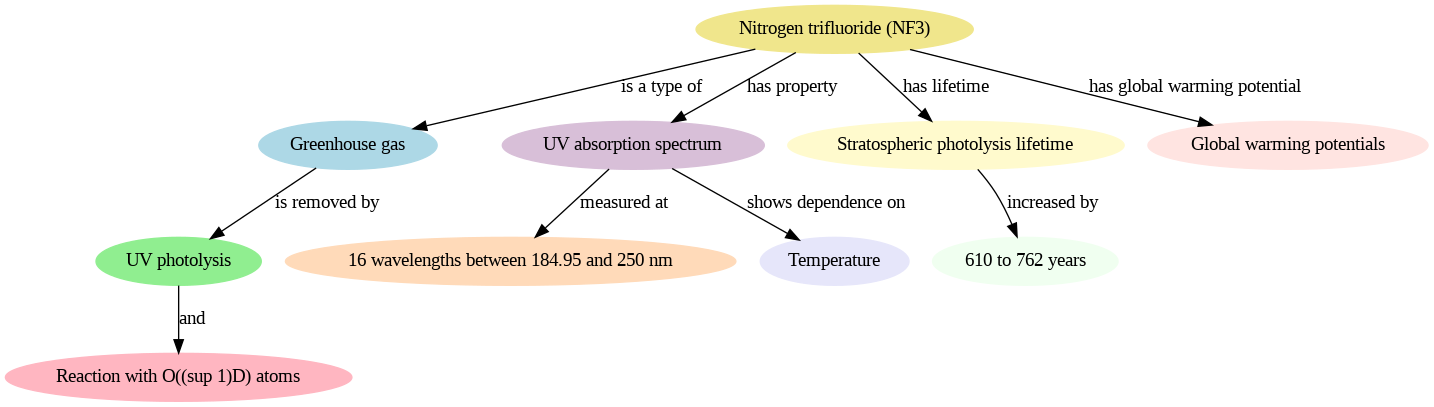

In [40]:
# Input article text
article_text = """
    'Nitrogen trifluoride (NF3) is an atmospherically persistent greenhouse gas that is primarily removed by UV photolysis and reaction with O((sup 1)D) atoms. In this work, the NF3 gas-phase UV absorption spectrum, sigma(delta,T), was measured at 16 wavelengths between 184.95 and 250 nm at temperatures between 212 and 296 K. A significant spectrum temperature dependence was observed in the wavelength region most relevant to atmospheric photolysis (200-220 nm) with a decrease in sigma(210 nm,T) of approximately 45 percent between 296 and 212 K. Atmospheric photolysis rates and global annually averaged lifetimes of NF3 were calculated using the Goddard Space Flight Center 2-D model and the sigma(delta,T) parameterization developed in this work. Including the UV absorption spectrum temperature dependence increased the stratospheric photolysis lifetime from 610 to 762 years and the total global lifetime from 484 to 585 years; the NF3 global warming potentials on the 20-, 100-, and 500-year time horizons increased less than 0.3, 1.1, and 6.5 percent to 13,300, 17,700, and 19,700, respectively.'
"""
# Constraints
max_edge_density = 3
num_nodes = 10
num_tokens = 1000

# Truncate article text
num_chars = min(len(article_text), 4 * num_tokens)
article_text = article_text[:num_chars]

# Generate a knowledge graph
response = openai.ChatCompletion.create(
    model="gpt-4",
    messages=[
        {
            "role": "system",
            "content": f'Generate a Knowledge Graph that explains the article text given, explains meaningful relationships and simplifies while adding context the article, given the constraints. The node and edge are described as dictionaries below:\nNode = {{\nid: (1/2/3...)\nlabel:(text label)\ncolor: HEX Code of light pastel color unique to the node that goes well with black text and line\n}}\nEdge = {{\nsrc: id of source node\ndst: id of dest node\nlabel: text label of edge\n}}\nReturn a compressed JSON object:\n{{ "edges": [list of edges],\n"nodes": [list of nodes]\n}}\nConstraints: \nMax edge density: number of edges per node = {max_edge_density}\nMax number of nodes = {num_nodes}. Think carefully about what would be src and dst node in an edge according to the label used to describe the edge/relation.',
        },
        {"role": "user", "content": f"Article: {article_text}"},
    ],
    temperature=0.4,
    max_tokens=3925,
    top_p=1,
    frequency_penalty=0,
    presence_penalty=0,
)

data = response["choices"][0]["message"]["content"]

json_data = json.loads(data)

# Create and render a graph using Graphviz
graph_name = "".join("MyGraph")
knowledge_graph = graphviz.Digraph(graph_name, format="png")

# Add nodes to the graph
for node in json_data["nodes"]:
    knowledge_graph.node(
        str(node["id"]), label=node["label"], color=node["color"], style="filled"
    )

# Add edges to the graph
for edge in json_data["edges"]:
    knowledge_graph.edge(str(edge["src"]), str(edge["dst"]), label=edge["label"])

# Save the graph as an image
path = os.path.join(graphs_dir, graph_name + ".png")
knowledge_graph.render(graph_name, directory=graphs_dir, format="png")

# Open the image
kg = Image.open(path)

# Display the image (you can replace this with saving or further processing)
kg

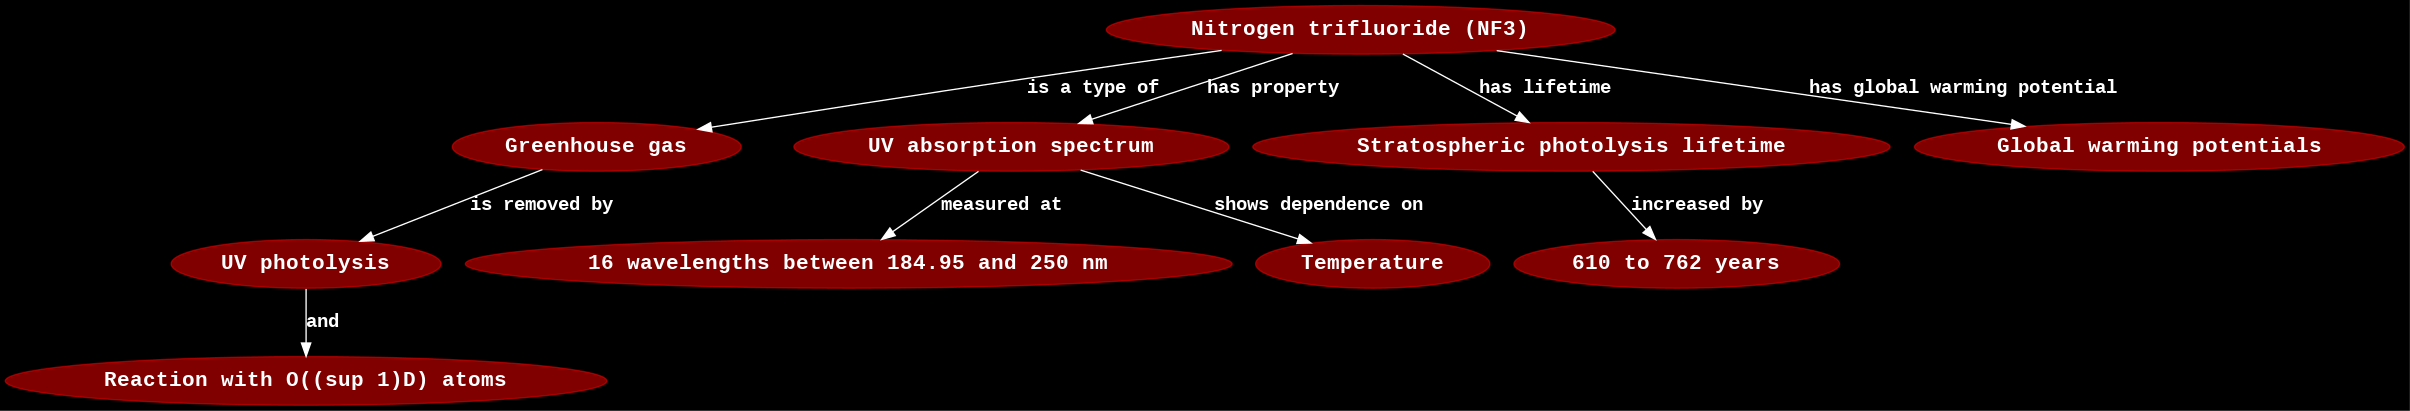

In [41]:
# Reformatting graph elements manually, instead of via prompt 
graph_name = "".join("MyGraph2")
knowledge_graph = graphviz.Digraph(graph_name, graph_attr={"bgcolor": "black"}, format="png")

node_attributes = {
    "fontsize": "16",  # Adjust font size as needed
    "fontname": "bold",  # Use a bold font
    "style": "filled",
    "fillcolor": "#FF000080",  # Node color
    "color": "#FF000080",  # Node color
}
edge_attributes = {
    "fontsize": "14",  # Adjust font size as needed
    "fontname": "bold",  # Use a bold font
}

# Add nodes to the graph
for node in json_data["nodes"]:
    knowledge_graph.node(
        str(node["id"]), label=node["label"], fontcolor="white", **node_attributes
    )

# Add edges to the graph
for edge in json_data["edges"]:
    knowledge_graph.edge(str(edge["src"]), str(edge["dst"]), label=edge["label"], color="white", fontcolor="white", **edge_attributes)

# Save the graph as an image
path = os.path.join(graphs_dir, graph_name + ".png")
knowledge_graph.render(graph_name, directory=graphs_dir, format="png")

# Open the image
kg = Image.open(path)

# Display the image (you can replace this with saving or further processing)
kg